# Análise Exploratória dos Dados - Previsão de Churn

Este notebook tem como objetivo realizar uma análise exploratória dos dados de clientes de uma empresa de telecomunicações, com foco em entender os fatores que influenciam o **cancelamento de serviço (churn)**.
}
Os dados analisados serão posteriormente utilizados na construção de um modelo preditivo supervisionado.


## Dicionário de Dados

Abaixo estão as descrições das principais variáveis do dataset `telco_churn.csv`:

| Variável            | Tipo         | Descrição |
|---------------------|--------------|-----------|
| `customerID`        | string       | Identificador único do cliente |
| `gender`            | categórica   | Gênero do cliente (`Male`, `Female`) |
| `SeniorCitizen`     | numérica     | 1 se for idoso (>= 65 anos), 0 caso contrário |
| `Partner`           | categórica   | Cliente possui parceiro(a)? (`Yes` ou `No`) |
| `Dependents`        | categórica   | Cliente possui dependentes? (`Yes` ou `No`) |
| `tenure`            | numérica     | Tempo de contrato com a empresa (em meses) |
| `PhoneService`      | categórica   | Possui serviço de telefone? |
| `MultipleLines`     | categórica   | Possui múltiplas linhas telefônicas? |
| `InternetService`   | categórica   | Tipo de serviço de internet contratado |
| `OnlineSecurity`    | categórica   | Possui serviço de segurança online? |
| `OnlineBackup`      | categórica   | Possui serviço de backup online? |
| `DeviceProtection`  | categórica   | Possui proteção de dispositivo? |
| `TechSupport`       | categórica   | Possui suporte técnico? |
| `StreamingTV`       | categórica   | Possui serviço de streaming de TV? |
| `StreamingMovies`   | categórica   | Possui serviço de streaming de filmes? |
| `Contract`          | categórica   | Tipo de contrato (`Month-to-month`, `One year`, `Two year`) |
| `PaperlessBilling`  | categórica   | Recebe fatura digital? (`Yes` ou `No`) |
| `PaymentMethod`     | categórica   | Método de pagamento utilizado |
| `MonthlyCharges`    | numérica     | Valor mensal cobrado do cliente |
| `TotalCharges`      | numérica     | Valor total cobrado durante o tempo de contrato |
| `Churn`             | categórica (alvo) | Se o cliente cancelou o serviço (`Yes` ou `No`) |


## Importações

In [2]:
#Realizando as importações

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Leitura dos dados

In [3]:
telco = pd.read_csv('../data/telco_churn.csv')

In [4]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Estrutura e resumo estatístico

In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Distribuição das variáveis numéricas

In [8]:
num_cols = telco.select_dtypes(include=['int64', 'float64']).columns
cat_cols = telco.select_dtypes(include='object').columns

array([[<Axes: title={'center': 'SeniorCitizen'}>,
        <Axes: title={'center': 'tenure'}>],
       [<Axes: title={'center': 'MonthlyCharges'}>, <Axes: >]],
      dtype=object)

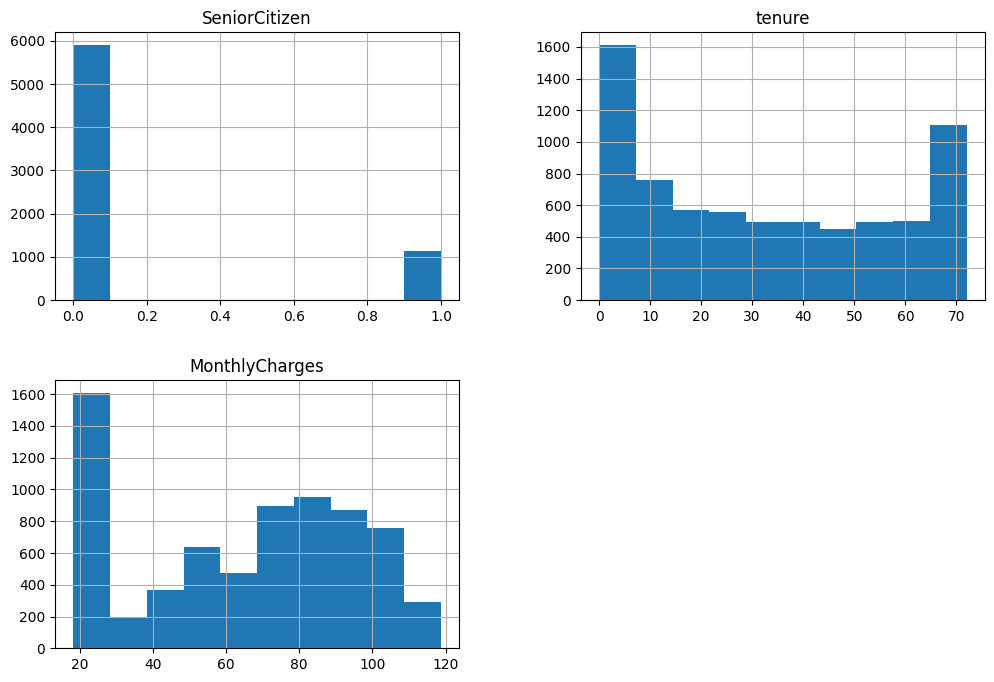

In [9]:
telco[num_cols].hist(figsize=(12,8))


## Análise de variáveis categóricas em relação ao Churn


Vamos verificar como cada variável categórica está relacionada com a variável alvo (`Churn`). Isso ajuda a identificar padrões de comportamento entre clientes que cancelaram e os que permaneceram.


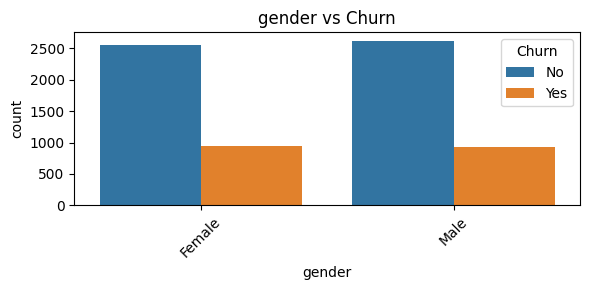

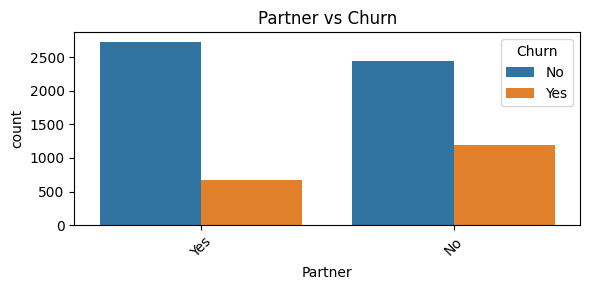

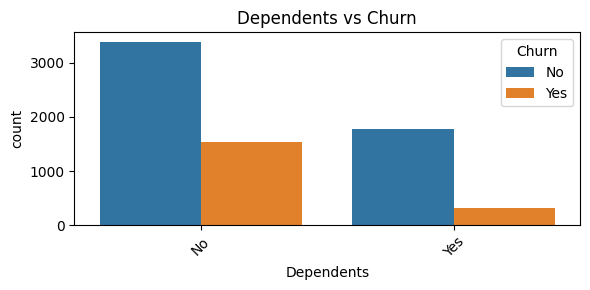

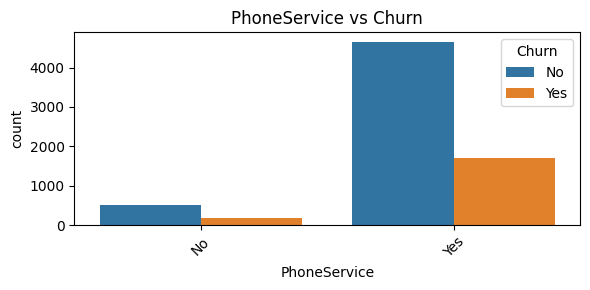

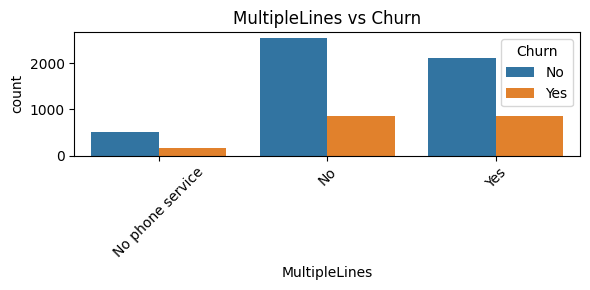

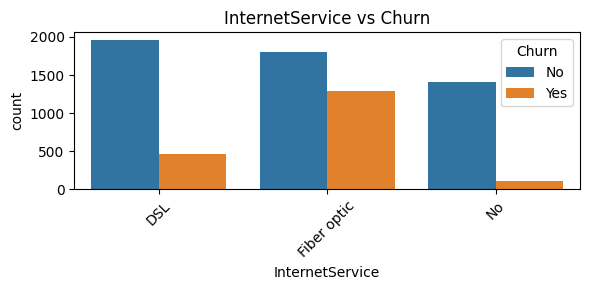

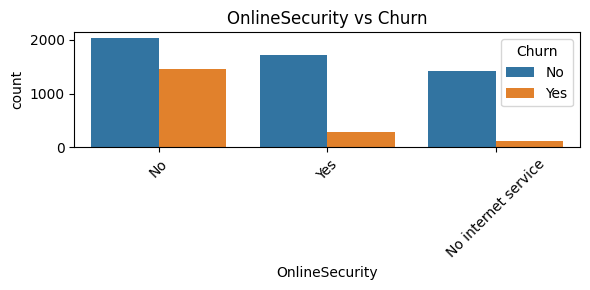

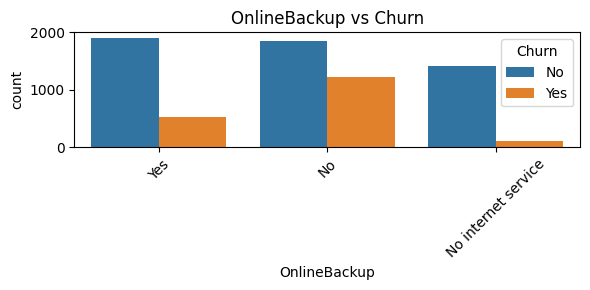

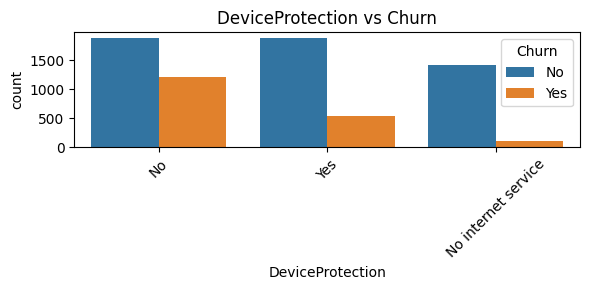

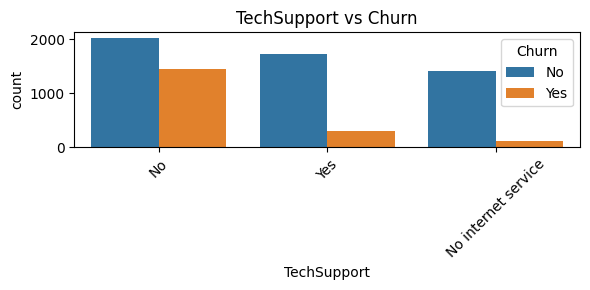

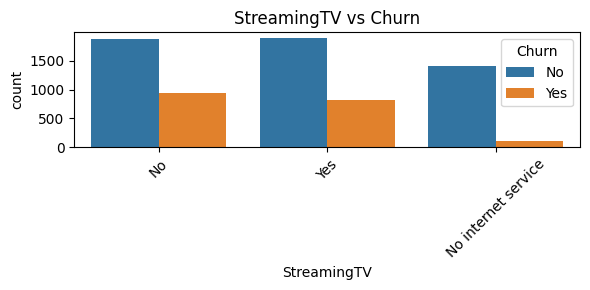

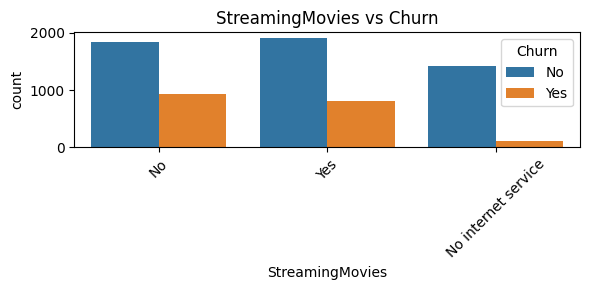

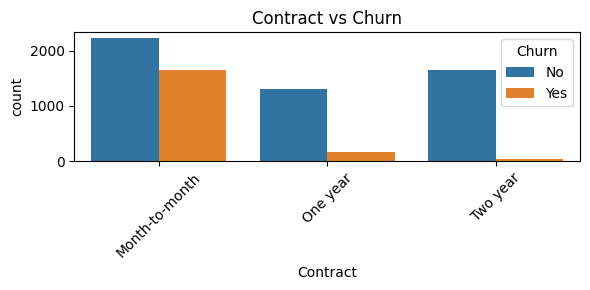

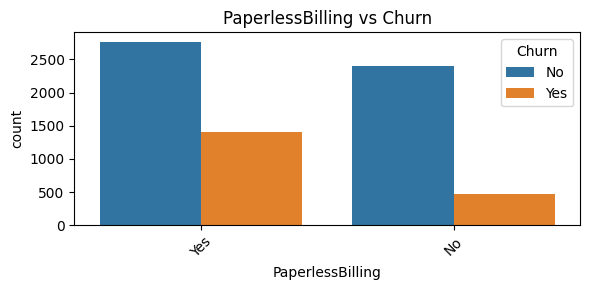

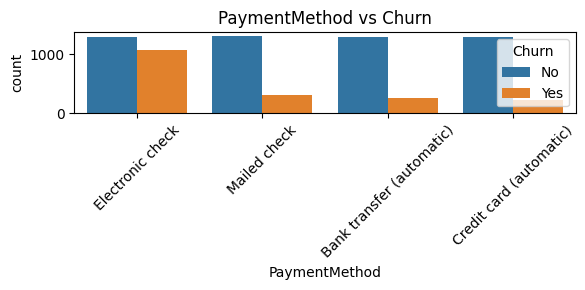

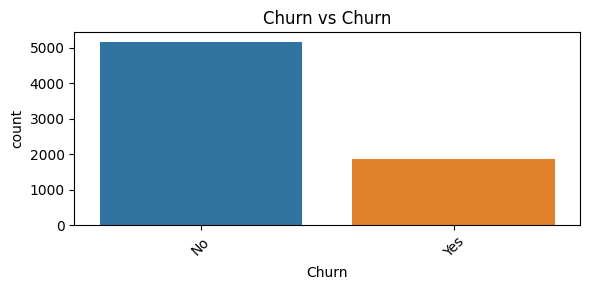

In [10]:
# Exibir apenas variáveis categóricas com poucas categorias
cat_cols = telco.select_dtypes(include='object').columns
for col in cat_cols:
    if col not in ['customerID', 'TotalCharges'] and telco[col].nunique() < 20:
        plt.figure(figsize=(6,3))
        sns.countplot(x=col, hue='Churn', data=telco)
        plt.title(f'{col} vs Churn')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


## Correlação entre variáveis numéricas

Vamos verificar a correlação entre as variáveis numéricas com um heatmap.

<Axes: >

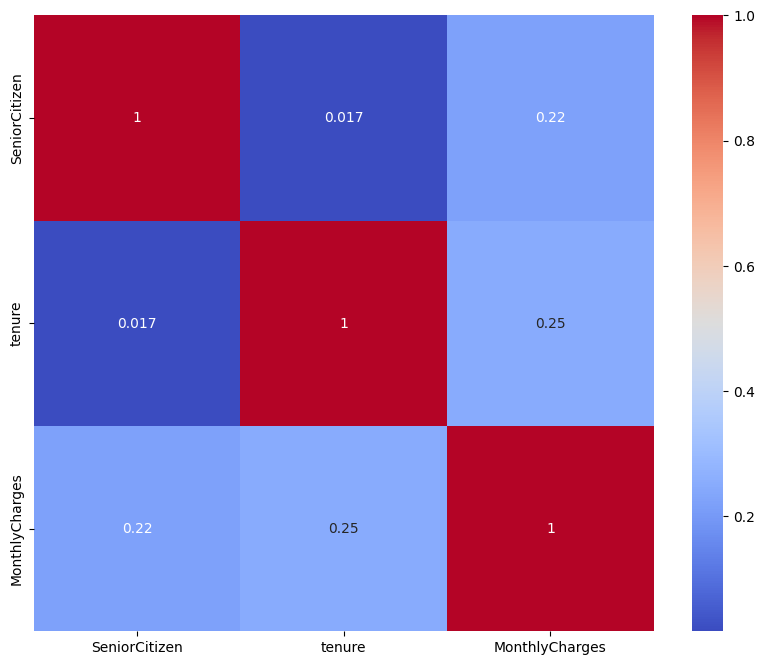

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(telco[num_cols].corr(), annot=True, cmap='coolwarm')

## Conclusões iniciais

- A base está razoavelmente equilibrada, mas existe um percentual considerável de churn (cancelamento).
- Clientes com menor tempo de contrato, faturas mensais mais altas ou contratos mensais tendem a ter maior churn.
- Algumas variáveis categóricas mostram padrão claro de comportamento com churn e devem ser consideradas na modelagem.

Essa análise fornece uma base sólida para a próxima etapa: **preparação dos dados e modelagem supervisionada.**
